In [3]:
from sympy import *
import scipy.integrate as integrate
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt


In [10]:
g = 0.44
f_std = 0.5

f0_vals = np.linspace(-10, 10, 400)

Q=[]
Q_approx=[]

def lorentian(x, nm, gam):
    return nm*(gam**2/(x**2+gam**2))


for f0 in f0_vals:

    n_m = (1/(np.pi*g))*(g**2/(g**2+f0**2))

    gaus_fun = lambda x: exp(-(x-f0)**2/(2*f_std**2))
    
    df=0.6
    res = integrate.quad(gaus_fun, f0-df, f0+df)
    alpha = 1/res[0]
    fun_approx = lambda x: (n_m-(2/np.pi)*(g*x/(g**2+x**2)**2)*(x-f0))*alpha*exp(-(x-f0)**2/(2*f_std**2)) #sqrt(2*np.pi*f_std**2)
    
    result_approx = integrate.quad(fun_approx, f0-df, f0+df)

    dx=50
    res = integrate.quad(gaus_fun, f0-df, f0+df)
    alpha = 1/res[0]
    fun = lambda x: (1/(np.pi*g)*g**2/(g**2+x**2))*alpha*exp(-(x-f0)**2/(2*f_std**2)) #sqrt(2*np.pi*f_std**2)
    
    result = integrate.quad(fun, f0-df, f0+df) 

    Q.append(result[0]/n_m-1)
    Q_approx.append(result_approx[0]/n_m-1)


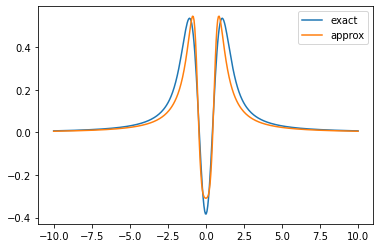

In [11]:
plt.plot(x0_vals, Q, "-", label="exact")
plt.plot(x0_vals, Q_approx, "-", label="approx")
plt.legend()
plt.show()